<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/miniproject_W3D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

**The US Superstore Dataset contains the following attributes:**

**Row ID**: Unique ID for each row.

**Order ID**: Unique Order ID for each Customer.

**Order Date**: Order Date of the product.

**Ship Date**: Shipping Date of the Product.

**Ship Mode**: Shipping Mode specified by the Customer.

**Customer ID**: Unique ID to identify each Customer.

**Customer Name**: Name of the Customer.

**Segment**: The segment where the Customer belongs.

**Country**: Country of residence of the Customer.

**City**: City of residence of the Customer.

**State**: State of residence of the Customer.

**Postal Code**: Postal Code of every Customer.

**Region**: Region where the Customer belongs.

**Product** ID: Unique ID of the Product.

**Category**: Category of the product ordered.

**Sub-Category**: Sub-Category of the product ordered.

**Product Name**: Name of the Product.

**Sales**: Sales of the Product.

**Quantity**: Quantity of the Product.

**Discount**: Discount provided.

**Profit**: Profit/Loss incurred.

# First load the dataset in a notebook and preprocess it.

In [2]:
df = pd.read_excel('/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# check duplicates in each colomn
duplicates = df.duplicated()
print(duplicates.sum())

0


In [5]:
df['Product ID'].duplicated().sum()

8132

In [6]:
df[df['Product ID'].duplicated(keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Visualize Which states have the most sales?

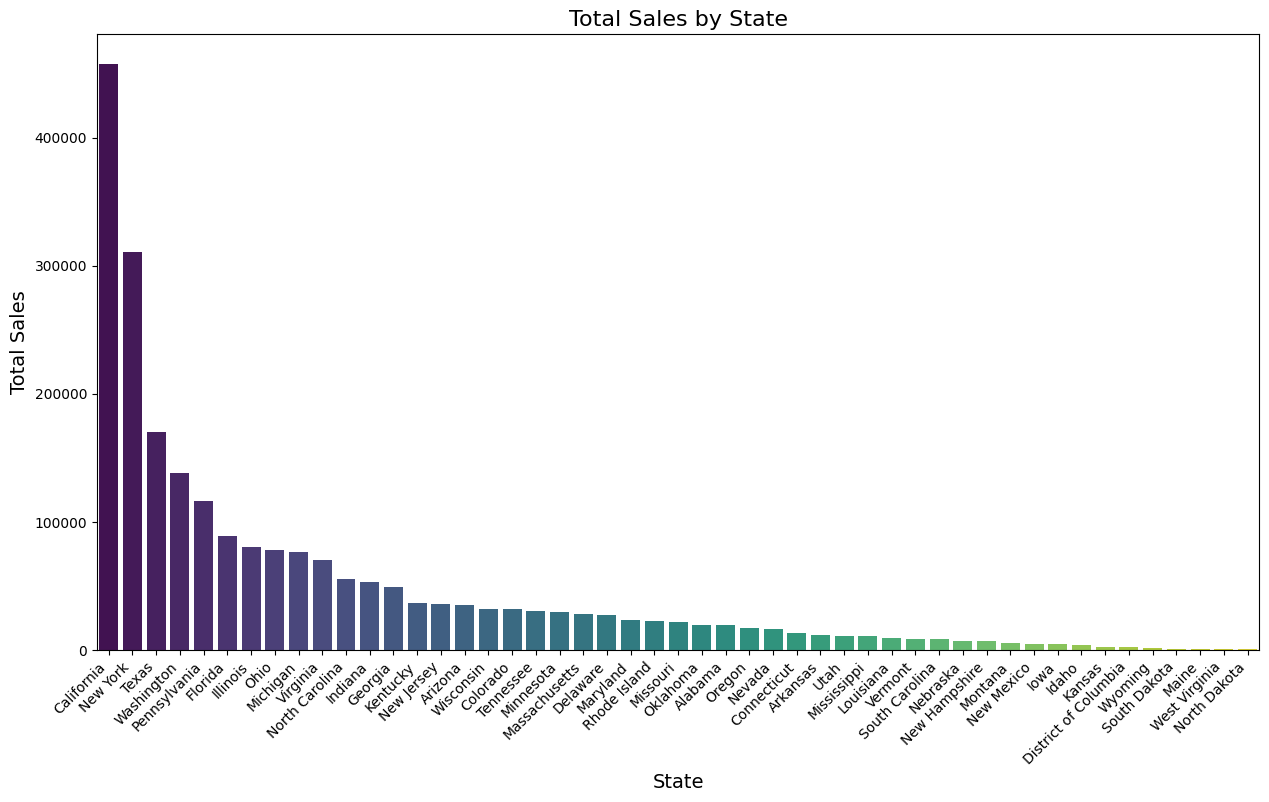

In [7]:
# Aggregate sales by state
state_sales = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Set the figure size and style
plt.figure(figsize=(15, 8))
sns.barplot(x='State', y='Sales', hue='State', data=state_sales, palette='viridis', dodge=False, legend=False)

# Add labels and title
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales by State', fontsize=16)
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

# What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

In [8]:
# Filter data for New York and California and calculate total sales and total profit
two_states_sales = df[df['State'].isin(['New York', 'California'])].groupby('State')[['Sales', 'Profit']].sum().reset_index()

# Display the result
print(two_states_sales)


        State        Sales      Profit
0  California  457687.6315  76381.3871
1    New York  310876.2710  74038.5486


In [9]:
# Calculate the differences
sales_diff = (two_states_sales.loc[two_states_sales['State'] == 'New York', 'Sales'].values[0] - \
             two_states_sales.loc[two_states_sales['State'] == 'California', 'Sales'].values[0]).round(2)

profit_diff = (two_states_sales.loc[two_states_sales['State'] == 'New York', 'Profit'].values[0] - \
              two_states_sales.loc[two_states_sales['State'] == 'California', 'Profit'].values[0]).round(2)

# Display the result
print("Difference in Sales (New York - California):", sales_diff)
print("Difference in Profit (New York - California):", profit_diff)

Difference in Sales (New York - California): -146811.36
Difference in Profit (New York - California): -2342.84


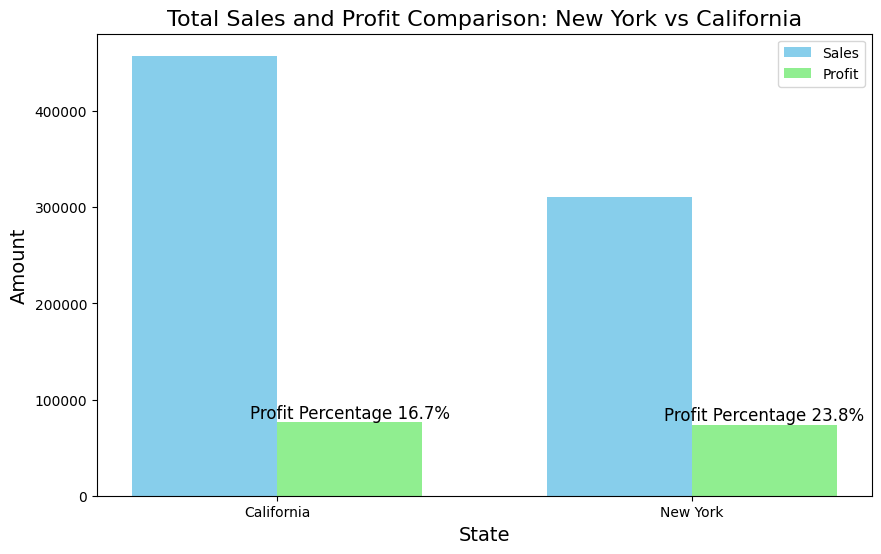

In [10]:
# Calculate the profit percentage from sales for each state
two_states_sales['Profit Percentage'] = (two_states_sales['Profit'] / two_states_sales['Sales']) * 100

# Set the positions and width for the bars
bar_width = 0.35
positions = np.arange(len(two_states_sales))

# Create the bar chart
plt.figure(figsize=(10, 6))
bars_sales = plt.bar(positions, two_states_sales['Sales'], width=bar_width, label='Sales', color='skyblue')
bars_profit = plt.bar(positions + bar_width, two_states_sales['Profit'], width=bar_width, label='Profit', color='lightgreen')

# Annotate each bar with the profit percentage
for i, bar in enumerate(bars_profit):
    height = bar.get_height()
    percentage = two_states_sales['Profit Percentage'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'Profit Percentage {percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('State', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Total Sales and Profit Comparison: New York vs California', fontsize=16)
plt.xticks(positions + bar_width / 2, two_states_sales['State'])
plt.legend()

# Display the plot
plt.show()

In [11]:
two_states_sales.head()

,State,Sales,Profit,Profit Percentage
0,California,457687.6315,76381.3871,16.688541
1,New York,310876.2710,74038.5486,23.816082


While California has significantly higher sales, the profit margin percentage is higher in New York, indicating that New York is more efficient in generating profit relative to its sales. Here’s the breakdown:

Sales: California has a much larger sales volume (with a difference of 146,811.36 in total sales).
Profit Margin: New York's profit margin (23.8%) is higher than California's (16.7%).



# Who is an outstanding customer in New York?

In [12]:
# Filter the data for New York
new_york_data = df[df['State'] == 'New York']

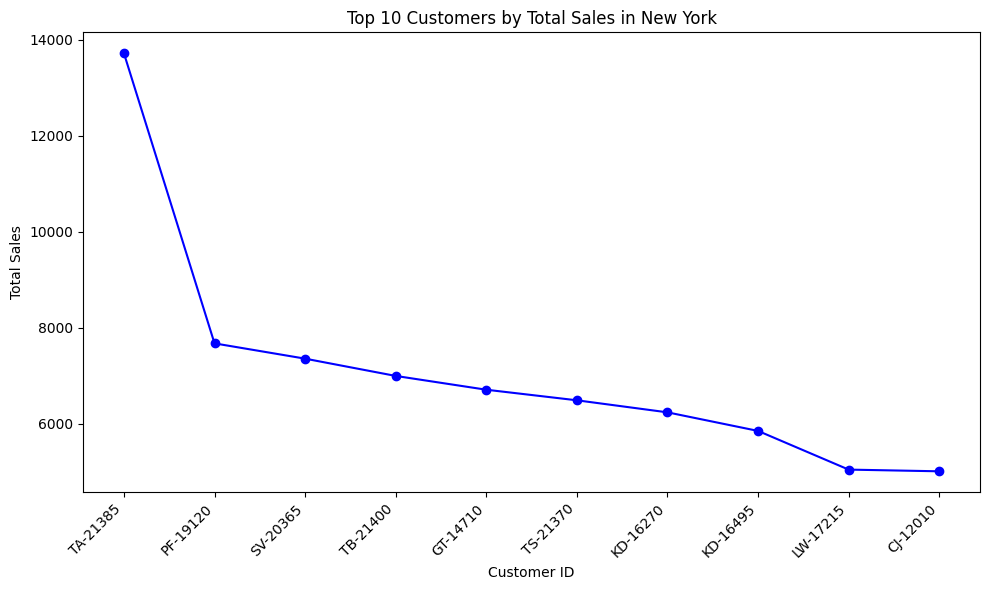

In [13]:
# Grouping by 'Customer ID' and summing sales, then sorting by sales in descending order
sales_by_customer = new_york_data.groupby('Customer ID')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Get the top 10 customers
top_10_sales = sales_by_customer.head(10)

# Create a line plot for the top 10 customers
plt.figure(figsize=(10, 6))
plt.plot(top_10_sales['Customer ID'], top_10_sales['Sales'], marker='o', linestyle='-', color='b')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Total Sales in New York')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [14]:
sales_by_customer.head()

,Customer ID,Sales
380,TA-21385,13723.498
309,PF-19120,7678.228
373,SV-20365,7359.918
387,TB-21400,6999.960
169,GT-14710,6712.744


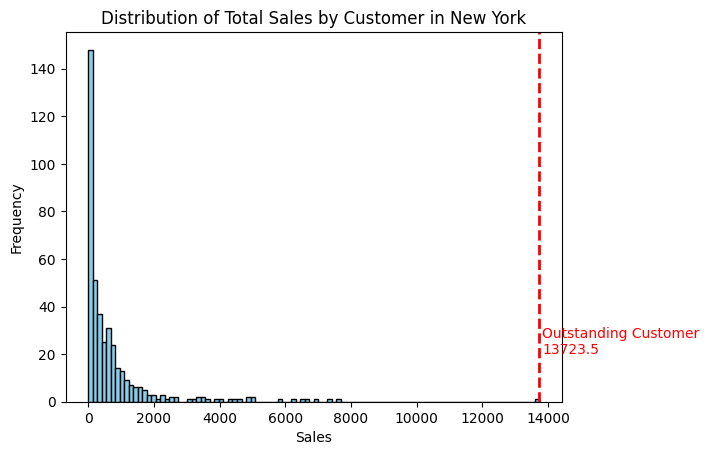

In [15]:
# Create a histogram of the 'Sales' column
plt.hist(sales_by_customer['Sales'], bins=100, color='skyblue', edgecolor='black')
# Highlight the outstanding customer by adding a vertical line
plt.axvline(sales_by_customer['Sales'].values[0], color='red', linestyle='dashed', linewidth=2)
# Add a label to the line for clarity
plt.text(sales_by_customer['Sales'].values[0] + 100, 20, f'Outstanding Customer\n{sales_by_customer["Sales"].values[0].round(2)}', color='red')

# Display the plot
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales by Customer in New York')
plt.show()

We see one outstanding customer in our data with the Customer ID "TA-21385" who spent 13723.498

# Are there any differences among states in profitability?

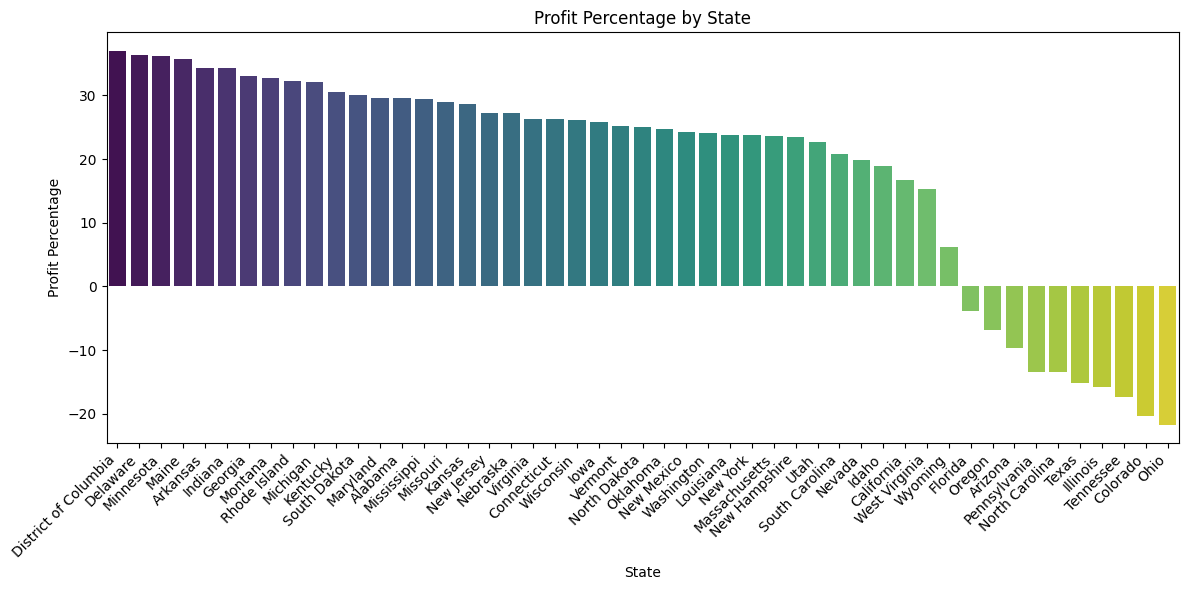

In [16]:
# Aggregate profit by state
state_profit = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()

# Calculate the profit percentage from sales for each state
state_profit['Profit Percentage'] = (state_profit['Profit'] / state_profit['Sales']) * 100

# Sort the DataFrame by profit percentage
state_profit_sorted = state_profit.sort_values(by='Profit Percentage', ascending=False)

# Visualize the profit percentage for each state with sorted values
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Profit Percentage', hue="State", data=state_profit_sorted, palette='viridis', order=state_profit_sorted['State'])

# Add labels and title
plt.xlabel('State')
plt.ylabel('Profit Percentage')
plt.title('Profit Percentage by State')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

The best profitability has District of Columbia (over 30%) and the worst - Ohio.

# The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)

In [17]:
# Calculate total profit by customer
customers_profit = df.groupby('Customer ID')['Profit'].sum().reset_index()

# Calculate common (total) profit
common_profit = df['Profit'].sum()

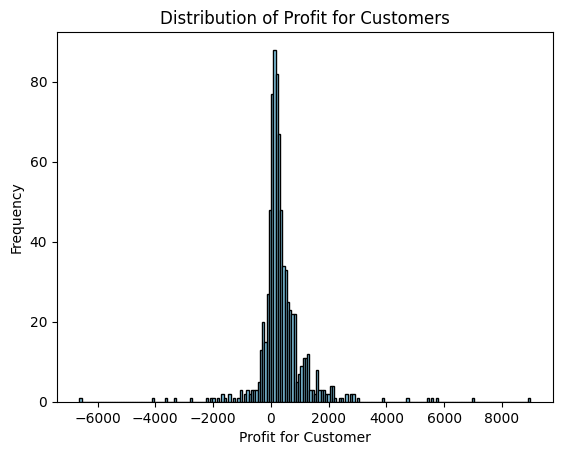

In [18]:
plt.hist(customers_profit['Profit'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Profit for Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Profit for Customers')
plt.show()

In [19]:
# Sort Customers by Profit in Descending Order
customers_profit = customers_profit.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Find top 20% of Profit Cusmomers
top_20_percent_cutoff = len(customers_profit) * 0.2
top_20_percent_customers = customers_profit.head(int(top_20_percent_cutoff))

# Find total profit for top_20_percent_customers
total_profit_top_20_percent = top_20_percent_customers['Profit'].sum()

pareto_point = total_profit_top_20_percent / common_profit *100

print(f"Top 20% of Customers contribute: {total_profit_top_20_percent:.2f}$ of profit")
print(f"It is: {pareto_point:.2f}% from Total Profit")

Top 20% of Customers contribute: 233201.28$ of profit
It is: 81.43% from Total Profit


Yes, we can apply the Pareto principle to customers and profits (the top 20% of customers produced 81.43% of profits (even more than 80%)).

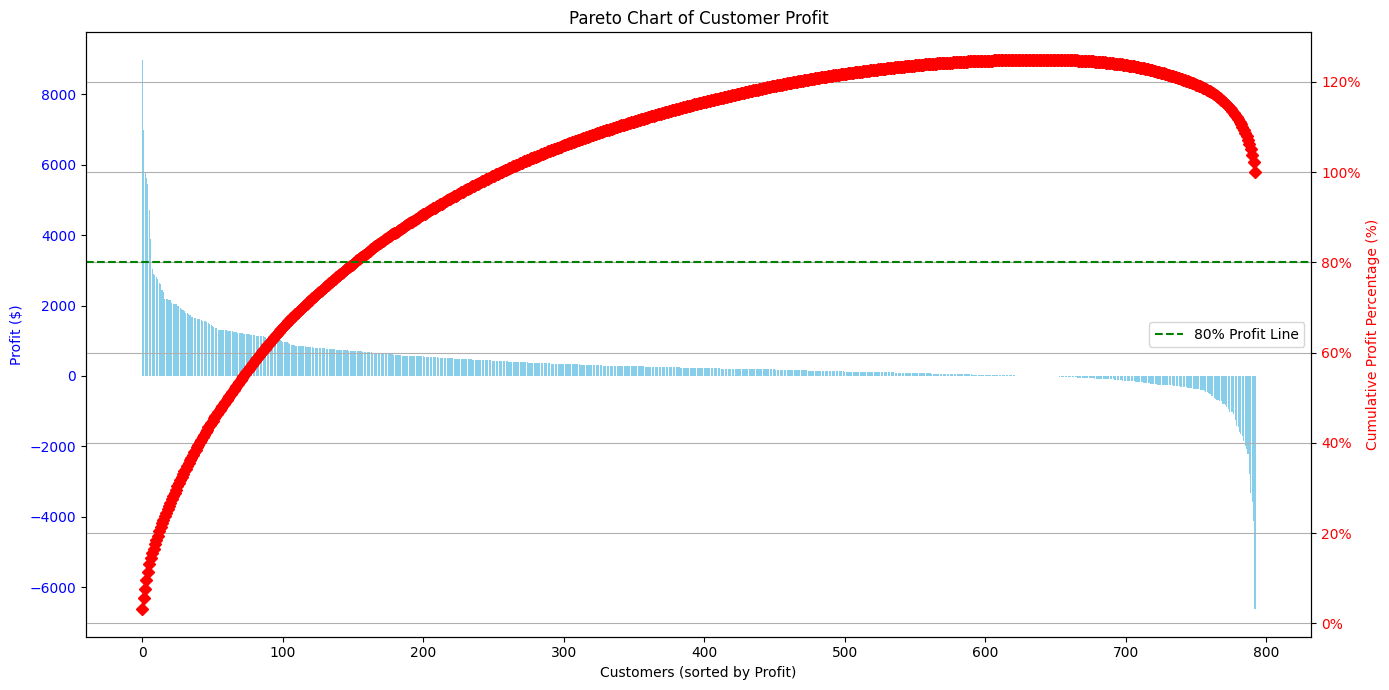

In [20]:
# Calculate Cumulative Profit Percentage
customers_profit['Cumulative Profit'] = customers_profit['Profit'].cumsum()
customers_profit['Cumulative Profit Percentage'] = (customers_profit['Cumulative Profit'] / customers_profit['Profit'].sum()) * 100

# Create Pareto Chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar Plot for Profit by Customer
ax1.bar(customers_profit.index, customers_profit['Profit'], color='skyblue')
ax1.set_xlabel('Customers (sorted by Profit)')
ax1.set_ylabel('Profit ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line Plot for Cumulative Profit Percentage
ax2 = ax1.twinx()
ax2.plot(customers_profit.index, customers_profit['Cumulative Profit Percentage'], color='red', marker='D', linestyle='-')
ax2.set_ylabel('Cumulative Profit Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axhline(y=80, color='green', linestyle='--', label='80% Profit Line')

# Fix Y-axis to Percentage Format
ax2.yaxis.set_major_formatter(PercentFormatter())

# Add Legend and Grid
ax2.legend(loc='center right')
plt.title('Pareto Chart of Customer Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

# What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

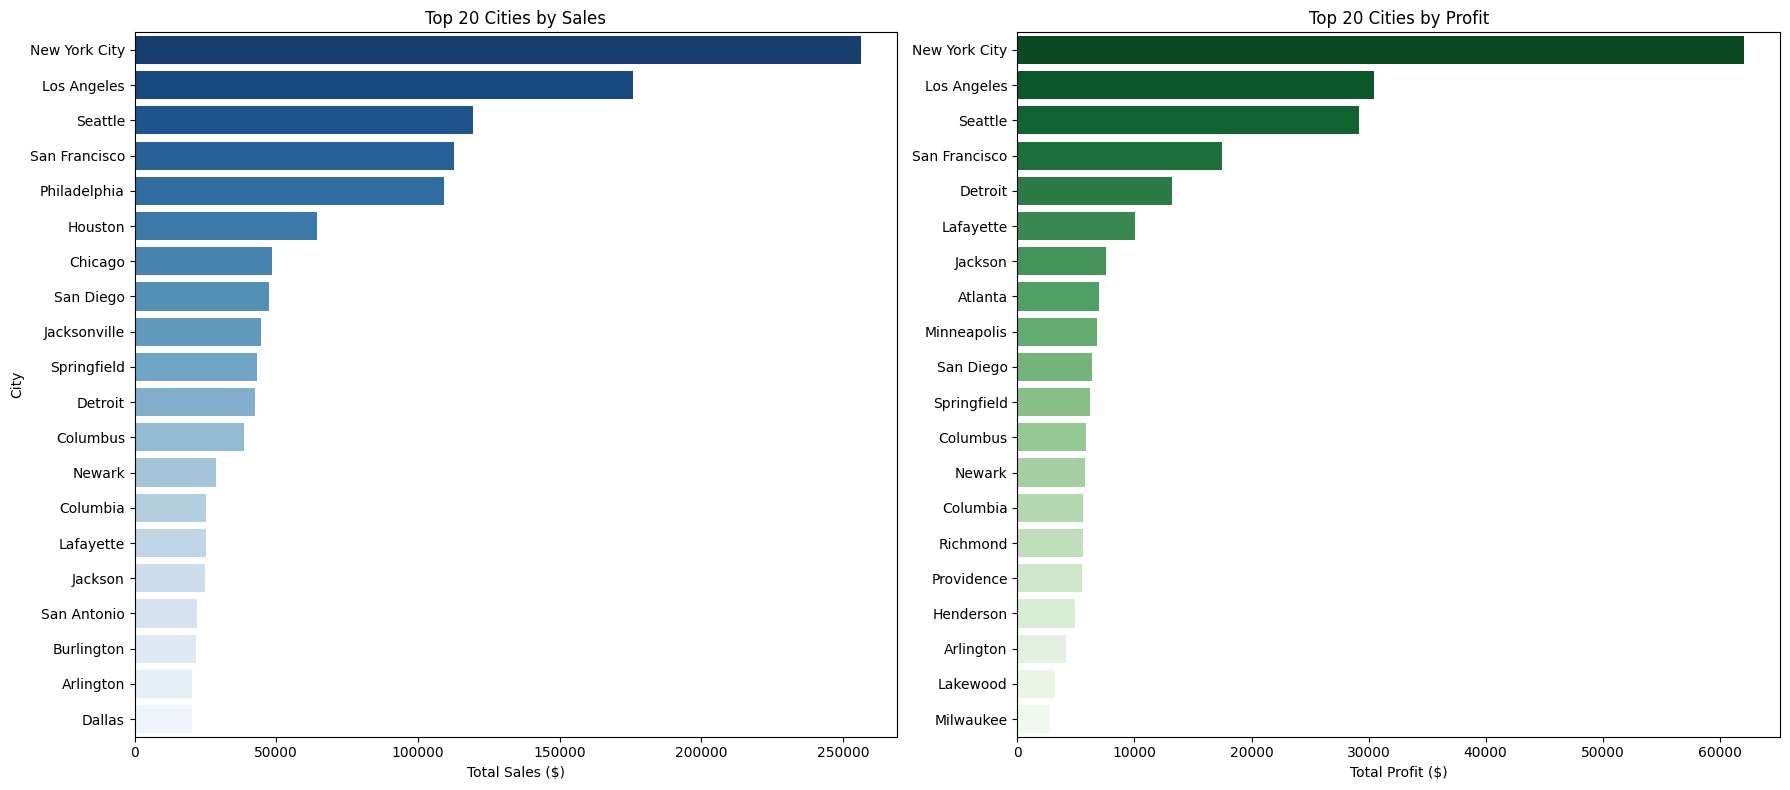

In [21]:
top_20_cities_sales = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(20)
top_20_cities_profit = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(20)

# Visualize
# Set figure size and layout
plt.figure(figsize=(18, 8))

# Subplot 1: Top 20 Cities by Sales
plt.subplot(1, 2, 1)
sns.barplot(x='Sales', y='City', hue='City', data=top_20_cities_sales, palette='Blues_r')
plt.title('Top 20 Cities by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('City')

# Subplot 2: Top 20 Cities by Profit
plt.subplot(1, 2, 2)
sns.barplot(x='Profit', y='City', hue='City', data=top_20_cities_profit, palette='Greens_r')
plt.title('Top 20 Cities by Profit')
plt.xlabel('Total Profit ($)')
plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

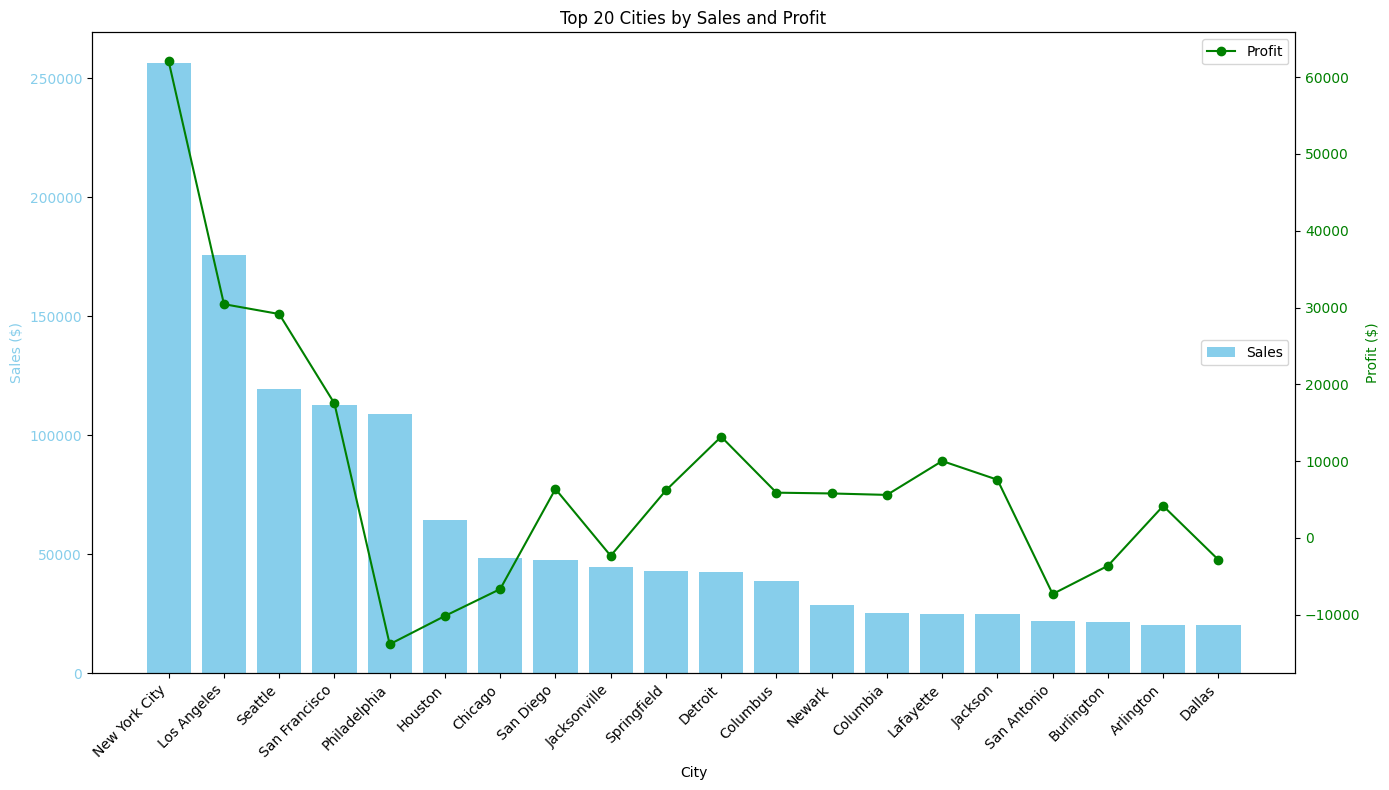

In [22]:
# Aggregate and sort data for top 20 cities by Sales
top_20_cities = df.groupby('City')[['Sales', 'Profit']].sum().reset_index().sort_values(by='Sales', ascending=False).head(20)

# Set figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for Sales
fig, ax1 = plt.subplots(figsize=(14, 8))
bar = ax1.bar(top_20_cities['City'], top_20_cities['Sales'], color='skyblue', label='Sales')
ax1.set_xlabel('City')
ax1.set_ylabel('Sales ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=45, ha = 'right')

# Create a second y-axis for Profit
ax2 = ax1.twinx()
line = ax2.plot(top_20_cities['City'], top_20_cities['Profit'], color='green', marker='o', label='Profit')
ax2.set_ylabel('Profit ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend
plt.title('Top 20 Cities by Sales and Profit')
ax1.legend(bar, ['Sales'], loc='right')
ax2.legend(line, ['Profit'], loc='upper right')

plt.tight_layout()
plt.show()


As we can see the first 4 position are the same (the cities with the biggest amount of sales and profit), but Philadelphia, Houston, Chicago already have abnormally low profits.  

On the other hand - Detroit, Lafayette, Arlington have very high profits.

# What are the Top 20 customers by Sales?

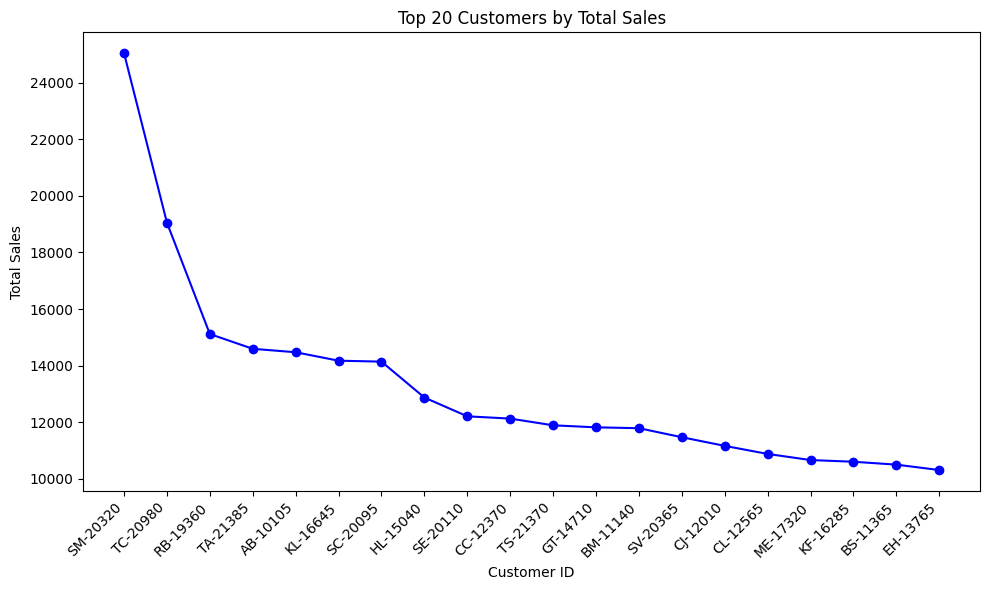

In [23]:
# Grouping by 'Customer ID' and summing sales, then sorting by sales in descending order
sales_by_customer_top20 = df.groupby('Customer ID')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(20)

# Create a line plot for the top 20 customers
plt.figure(figsize=(10, 6))
plt.plot(sales_by_customer_top20['Customer ID'], sales_by_customer_top20['Sales'], marker='o', linestyle='-', color='b')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('Top 20 Customers by Total Sales')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

In [24]:
print(f"The Top 20 customers by Sales: {', '.join(sales_by_customer_top20['Customer ID'])}")

The Top 20 customers by Sales: SM-20320, TC-20980, RB-19360, TA-21385, AB-10105, KL-16645, SC-20095, HL-15040, SE-20110, CC-12370, TS-21370, GT-14710, BM-11140, SV-20365, CJ-12010, CL-12565, ME-17320, KF-16285, BS-11365, EH-13765


# Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

In [26]:
# Calculate total sales by customer
customers_sales = df.groupby('Customer ID')['Sales'].sum().reset_index()

# Calculate common (total) sales
common_sales = df['Sales'].sum()

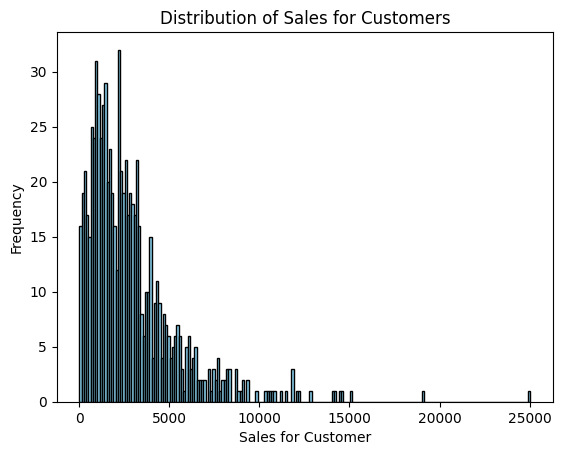

In [27]:
plt.hist(customers_sales['Sales'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Sales for Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Sales for Customers')
plt.show()

In [28]:
# Sort Customers by Sales in Descending Order
customers_sales = customers_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Find top 20% of Sales Cusmomers
top_20_percent_cutoff_sales = len(customers_sales) * 0.2
top_20_percent_customers_sales = customers_sales.head(int(top_20_percent_cutoff_sales))

# Find total sales for top_20_percent_customers_sales
total_sales_top_20_percent = top_20_percent_customers_sales['Sales'].sum()

pareto_point_sales = total_sales_top_20_percent / common_sales *100

print(f"Top 20% of Customers contribute: {total_sales_top_20_percent:.2f}$ of sales")
print(f"It is: {pareto_point_sales:.2f}% from Total Sales")

Top 20% of Customers contribute: 1101781.39$ of sales
It is: 47.96% from Total Sales


It seems that we can't apply Pareto Principle to Sales

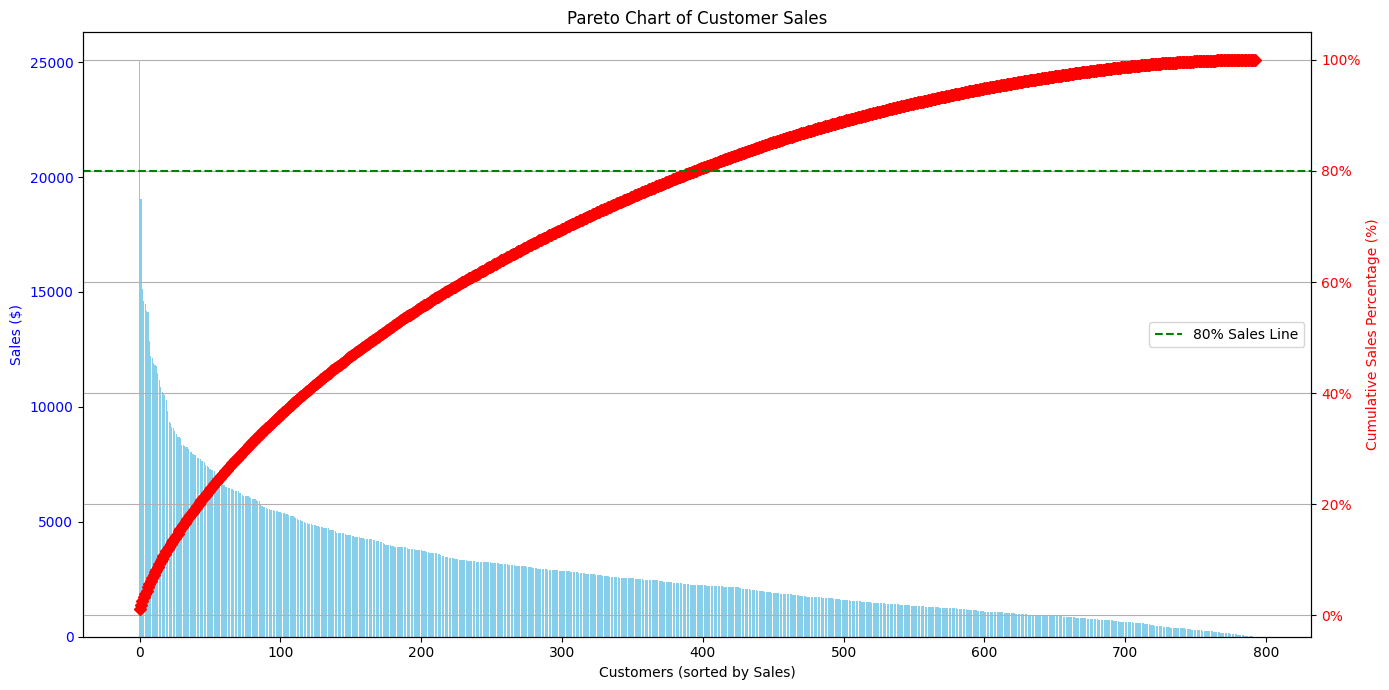

In [29]:
# Calculate Cumulative Sales Percentage
customers_sales['Cumulative Sales'] = customers_sales['Sales'].cumsum()
customers_sales['Cumulative Sales Percentage'] = (customers_sales['Cumulative Sales'] / customers_sales['Sales'].sum()) * 100

# Create Pareto Chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar Plot for Sales by Customer
ax1.bar(customers_sales.index, customers_sales['Sales'], color='skyblue')
ax1.set_xlabel('Customers (sorted by Sales)')
ax1.set_ylabel('Sales ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line Plot for Cumulative Sales Percentage
ax2 = ax1.twinx()
ax2.plot(customers_sales.index, customers_sales['Cumulative Sales Percentage'], color='red', marker='D', linestyle='-')
ax2.set_ylabel('Cumulative Sales Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axhline(y=80, color='green', linestyle='--', label='80% Sales Line')

# Fix Y-axis to Percentage Format
ax2.yaxis.set_major_formatter(PercentFormatter())

# Add Legend and Grid
ax2.legend(loc='center right')
plt.title('Pareto Chart of Customer Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Around 50% of Customers bring 80% Sales (in this case Pareto principle doesn't work)

# Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

The answer to this question depends on the strategy chosen. How do we want to ensure Profit growth? Perhaps we need to look at unprofitable states and cities, why are they unprofitable? Perhaps they have the largest percentage of loyal customers and their personal discount does not allow the company to make a profit. In this case, you should slightly increase prices in these states and cities, as well as attract new audiences, but without losing sight of loyal customers.

In states and cities like New York we can expand sales because those locations have the best margins.